### Testing on LinearRegression() and SVR()
- Dataset used :  https://seanwillems.com/publications to locate the .csv file.

#### Importing libraries & setting plot style

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
%matplotlib inline
%matplotlib widget

plt.style.use("default")
plt.close('all')
# plt.style.use("dark_background")
# plt.rcParams['figure.facecolor']=.07*np.ones(3)
# plt.rcParams['figure.edgecolor']=.07*np.ones(3)
# plt.rcParams['axes.facecolor']=.07*np.ones(3)  # set theme
# plt.rcParams['grid.linewidth']=.2

#### Generating the dataframe

In [3]:
dataframe = pd.read_csv("/Datasets/IntelData.csv")
experimentalDF = dataframe[['Week','Forecasted Demand','Customer Orders']].copy(deep=True)
# experimentalDF

#### Feature Extraction

In [4]:
allForecasts = experimentalDF.groupby('Week')['Forecasted Demand'].mean()
allCOs = experimentalDF.groupby('Week')['Customer Orders'].mean()
experimentalDF = allForecasts.to_frame(name='Forecasts')
experimentalDF['COs'] = allCOs

#### LinearRegression Model

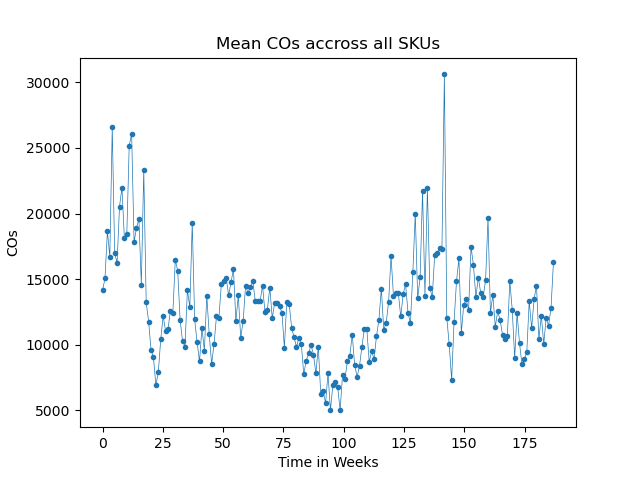

In [8]:
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde as gkde
plt.close('all')

N = len(experimentalDF)
x = np.linspace(0,len(experimentalDF['COs'].values),N)
y = experimentalDF['COs'].values
fig,ax = plt.subplots()

ax.plot(x,y,lw=.5,marker=".") 

ax.set_ylabel('COs')
ax.set_xlabel('Time in Weeks')
ax.title.set_text('Mean COs accross all SKUs')
model = LinearRegression()

polyOrder = 9
X = len(experimentalDF.index)
X_mat = np.empty((N,polyOrder+1),dtype =float)
X_mat[:,0] = 1
w = experimentalDF.index.values
y = y.reshape(len(y),1)
for k in range(polyOrder+1):
    X_mat[:,k] =w**k
    
# print(X_mat)
# model.fit(X_mat, y)
# yhat = model.predict(X_mat)
# ax.plot(x,yhat,label=f"k={k}")
# ax.legend()



# num="Error Distribution"
# if plt.fignum_exists(num):plt.close(num)
# figD, axD = plt.subplots(num=num)
# axD.hist(y-yhat,density=True,histtype="step")
# kernel = gkde(y[~np.isnan(y)]-yhat[~np.isnan(y)])
# x = np.linspace(-10_000,10_000,200)
# axD.plot(x,kernel(x))

#### SVR model

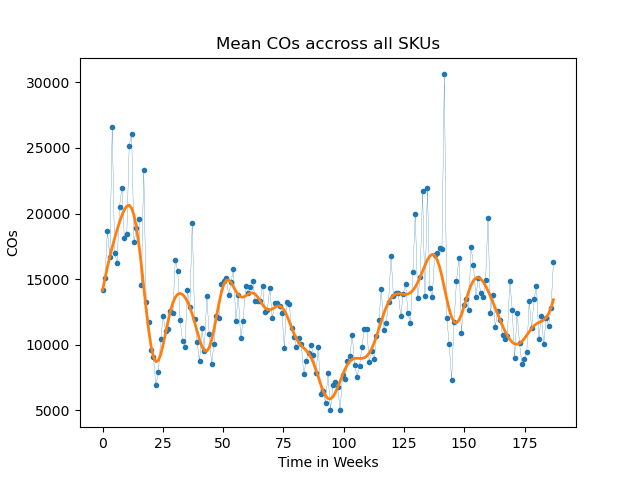

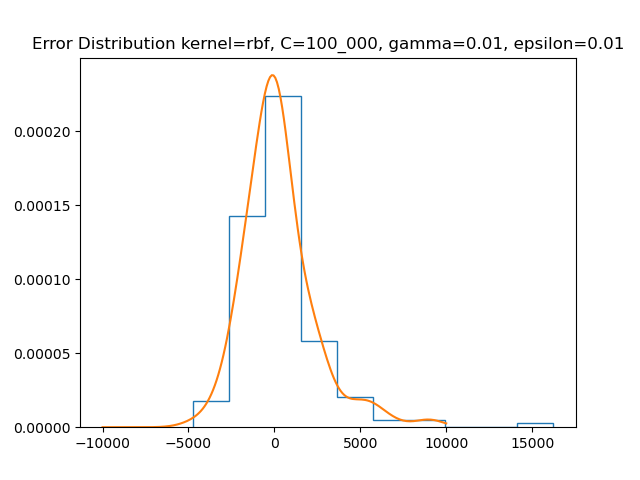

In [9]:
from sklearn.svm import SVR
plt.close('all')

N = len(experimentalDF)
X = np.linspace(0,len(experimentalDF['COs'].values),N)
y = experimentalDF['COs'].values
X = X.reshape(-1, 1)
# y = y.reshape(-1, 1)
fig,ax = plt.subplots()
ax.plot(X,y,lw=.2,marker=".") 

svr_rbf = SVR(kernel="rbf", C=100_000, gamma=0.01, epsilon=0.01)
# svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
# svr_lin = SVR(kernel="linear", C=100, gamma="auto")

yhat = svr_rbf.fit(X, y).predict(X)

ax.plot(X,yhat,lw=2)

ax.set_ylabel('COs')
ax.set_xlabel('Time in Weeks')
ax.title.set_text('Mean COs accross all SKUs')

num="Error Distribution"
if plt.fignum_exists(num):plt.close(num)
figD, axD = plt.subplots(num=num)
axD.hist(y-yhat,density=True,histtype="step")
kernel = gkde(y[~np.isnan(y)]-yhat[~np.isnan(y)])
x = np.linspace(-10_000,10_000,200)
axD.plot(x,kernel(x))
axD.title.set_text("Error Distribution kernel=rbf, C=100_000, gamma=0.01, epsilon=0.01")